## 개념
* 보통 A후 B라는 사건이 발생할 확률을 구하는데, 소비자의 구매 패턴 분석에 자주 사용 됨.
* 장바구니 분석이라고도 함. 소비자의 구매패턴을 사건의 연관규칙으로 분석 
* 비지도 학습
* runtest_1sample이 아닌 다른 형식의 데이터를 검정하는 기법은?

### RUN Test
* 연관 규칙을 찾기 전, 연속적인 관측값들이 임의적으로 나타난 값인지 먼저 검정하는 기법
* H0 : 연속적인 값이 임의적이다.
* 함수: runtest_1sample
  * cutoff: 큰값과 작은값으로 나누기 위한 기준(mean, median)
  * correction: 50미만의 샘플 사이즈 일 경우, 사건이 일어날 확률을 정의하기 어려움으로, 확률을 0.5로 수정한다.

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

data= ['a','a','a',
       'b','b',
       'a','a','a',
       'b','b','b','b','b',
       'a','a',
       'b','b',
       'a',
       'b','b']
# data= ['a','a','a','a','a','a','a','a','a','b','b','b','b','b','b','b','b','b','b','b']
# data= ['a','b','a','b','a','b','a','b','a','b','a','b','a','b','a','b','a','b','a','b']
# data1= ['a1','a1','b1','b1','a1','a1','a1','a1','b1','b1','b1','b1','b1','a1','a1','b1','b1','a1','b','b']
df =pd.DataFrame(data,columns=['product'])#.value_counts()
df.head()

,product
0,a
1,a
2,a
3,b
4,b


In [13]:
from statsmodels.sandbox.stats.runs import runstest_1samp
# df.loc[df['product'] == 'a','product'] = 1
# df.loc[df['product'] == 'b','product'] = 0
df =df.replace('a',0)
df =df.replace('b',1)
runstest_1samp(df['product'],cutoff=0.5, correction=True)
# p-value가 0.265이므로 귀무가설 채택. 즉 임의적으로 생성된 자료

(-1.1144881152070183, 0.26506984027306035)

### 연관 규칙 분석
* 효율적인 상품 진열이나 패키지 상품개발, 교차 판매 전력, 기획상품의 결정등 실제 고객의 데이터를 분석하는데 사용 
* 서로 다른 두 아이템이 얼마나 빈번하게 발생하는 관찰
* 장바구니 분석:장바구니에 무엇이 들어갈 것인지 분석
* 서열분석:A를 산 다음에 B를 살 것이다.

### 연관 규칙 분석에 사용되는 척도
* 지지도: A와B가 동시에 포함된 거래수 /전체 거래수,support(A -> B) 
* 신뢰도: A와B가 동시에 포함된 거래수 /A가 포함된 거래수,confidence(A -> B) 
* 향상도: A가 구매되지 않았을때 B의 구매확률에 비해 A가 구매되었을때 B의 구매확률의 증가비,lift(A -> B)
  * 향상도가 1이상이면, A와 B가 독립적인 경우보다 함께 발생할 가능성이 높음
  * 향상도가 1이면, A와 B가 독립적
  * 향상도가 1이상이면, A와 B가 독립적인 경우보다 함께 발생할 가능성이 낮음
  * 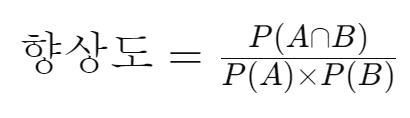
  * 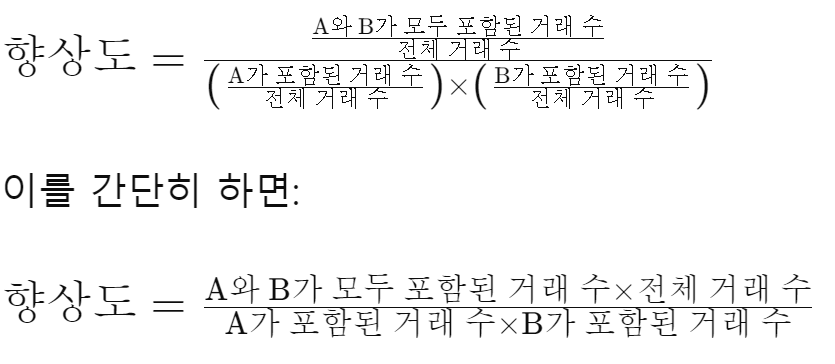

### Apriori알고리즘
* 모든 품목 집합에 대함 지지도를 전부 계산하는 것이 아니라, 최소 지지도 이상의 빈발항목집합을 찾은 후 그것에 대해서만 연관규칙 계산
* 장점: 구현과 이해가 쉬움
* 단점: 지지도가 낮은 후보 집합을 생성시 아이템의 개수가 많아지면 계산 복잡도가 증가함
* apriori 함수
  *
* association_rules

In [14]:
!pip3 install mlxtend
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [15]:
from mlxtend.preprocessing import TransactionEncoder
dataset =[['Apple','Beer','Rice','Chicken']
          ,['Apple','Beer','Rice']
          ,['Apple','Beer']
          ,['Apple','Bananas']
          ,['Milk','Beer','Rice','Chicken']
          ,['Milk','Beer','Rice']
          ,['Milk','Beer']
          ,['Apple','Bananas']
           ]
te = TransactionEncoder()
te_ary = te.fit_transform(dataset)
print(te.columns_)
te_ary
# run test하는 방법??

['Apple', 'Bananas', 'Beer', 'Chicken', 'Milk', 'Rice']


array([[ True, False,  True,  True, False,  True],
       [ True, False,  True, False, False,  True],
       [ True, False,  True, False, False, False],
       [ True,  True, False, False, False, False],
       [False, False,  True,  True,  True,  True],
       [False, False,  True, False,  True,  True],
       [False, False,  True, False,  True, False],
       [ True,  True, False, False, False, False]])

In [17]:
df= pd.DataFrame(te_ary, columns = te.columns_)
df

,Apple,Bananas,Beer,Chicken,Milk,Rice
0,True,False,True,True,False,True
1,True,False,True,False,False,True
2,True,False,True,False,False,False
3,True,True,False,False,False,False
4,False,False,True,True,True,True
5,False,False,True,False,True,True
6,False,False,True,False,True,False
7,True,True,False,False,False,False


In [25]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(df,min_support=0.01,use_colnames=False)
frequent_itemsets = apriori(df,min_support=0.5,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.625,(Apple)
1,0.750,(Beer)
2,0.500,(Rice)
3,0.500,"(Beer, Rice)"


In [18]:
frequent_itemsets = apriori(df,min_support=0.3,use_colnames=True)
frequent_itemsets['length'] =frequent_itemsets['itemsets'].str.len()
frequent_itemsets

,support,itemsets,length
0,0.625,(Apple),1
1,0.750,(Beer),1
2,0.375,(Milk),1
3,0.500,(Rice),1
4,0.375,"(Beer, Apple)",2
5,0.375,"(Beer, Milk)",2
6,0.500,"(Beer, Rice)",2


In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df= pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/groceries.csv")
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9834 entries, 0 to 9833
Data columns (total 1 columns):
 #   Column                                                  Non-Null Count  Dtype 
---  ------                                                  --------------  ----- 
 0   citrus fruit,semi-finished bread,margarine,ready soups  9834 non-null   object
dtypes: object(1)
memory usage: 77.0+ KB


,"citrus fruit,semi-finished bread,margarine,ready soups"
0,"tropical fruit,yogurt,coffee"
1,whole milk
2,"pip fruit,yogurt,cream cheese,meat spreads"
3,"other vegetables,whole milk,condensed milk,lon..."
4,"whole milk,butter,yogurt,rice,abrasive cleaner"
...,...
9829,"sausage,chicken,beef,hamburger meat,citrus fru..."
9830,cooking chocolate
9831,"chicken,citrus fruit,other vegetables,butter,y..."
9832,"semi-finished bread,bottled water,soda,bottled..."


In [31]:
df_split = df.iloc[:,0].str.splitex(',')#,pand= True)
df_split.values

AttributeError: 'StringMethods' object has no attribute 'splitex'

In [71]:
# df_split = df.iloc[:,0].str.split(',',expand= True).str.get(2)
# df_split.values
# df.iloc[:,0].str.split(',')
# .str.get(2)
# df.iloc[:,0].str

In [79]:
te=TransactionEncoder()
te_ary = te.fit_transform(df_split)
te.columns_
te_ary

array([[False, False, False, ..., False,  True, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False,  True, False],
       ...,
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
# cv= CountVectorizer(binary =True)
# tr_x_cv = cv.fit_transform(df)
# tr_x_cv.toarray()#.shape
# CountVectorizer & TransactionEncoder 주요 차이점 요약
# 목적:
    # CountVectorizer: 텍스트 데이터의 벡터화를 통해 단어 빈도를 분석하고, 이를 머신러닝 모델에 입력으로 사용.
    # TransactionEncoder: 거래 데이터의 벡터화를 통해 항목 간의 연관성을 분석하고, 이를 연관 규칙 분석에 사용.
# 이와 같이 CountVectorizer는 텍스트 데이터의 단어 빈도를 분석하는 데 사용되고, 
# TransactionEncoder는 장바구니 데이터의 항목 포함 여부를 분석하는 데 사용됩니다.

In [83]:
df= pd.DataFrame(te_ary, columns = te.columns_)
df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9829,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9830,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [85]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(df,min_support=0.01,use_colnames=True)
frequent_itemsets['length'] =frequent_itemsets['itemsets'].str.len()

In [87]:
from mlxtend.frequent_patterns import association_rules
association_rules(frequent_itemsets,metric='lift',min_threshold =.3).sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
460,(curd),"(yogurt, whole milk)",0.053285,0.056030,0.010067,0.188931,3.371961,0.007082,1.163859,0.743029
457,"(yogurt, whole milk)",(curd),0.056030,0.053285,0.010067,0.179673,3.371961,0.007082,1.154071,0.745190
441,(root vegetables),"(other vegetables, citrus fruit)",0.109010,0.028879,0.010372,0.095149,3.294710,0.007224,1.073238,0.781695
440,"(other vegetables, citrus fruit)",(root vegetables),0.028879,0.109010,0.010372,0.359155,3.294710,0.007224,1.390337,0.717195
559,"(other vegetables, yogurt)",(whipped/sour cream),0.043421,0.071690,0.010169,0.234192,3.266730,0.007056,1.212197,0.725380
...,...,...,...,...,...,...,...,...,...,...
404,(soda),(whole milk),0.174395,0.255542,0.040065,0.229738,0.899021,-0.004500,0.966499,-0.119755
120,(citrus fruit),(soda),0.082672,0.174395,0.012813,0.154982,0.888681,-0.001605,0.977026,-0.120146
121,(soda),(citrus fruit),0.174395,0.082672,0.012813,0.073469,0.888681,-0.001605,0.990067,-0.131735
87,(rolls/buns),(canned beer),0.183954,0.077690,0.011287,0.061360,0.789808,-0.003004,0.982603,-0.245922


In [91]:
rules = association_rules(frequent_itemsets,metric='lift',min_threshold =1)
rules['antecedents_len'] =rules['antecedents'].str.len()
rules.query("antecedents_len >= 2 & confidence >= 0.4 & lift >= 3")

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedents_len
419,"(root vegetables, citrus fruit)",(other vegetables),0.017694,0.193512,0.010372,0.586207,3.029300,0.006948,1.949012,0.681957,2
490,"(root vegetables, tropical fruit)",(other vegetables),0.021049,0.193512,0.012304,0.584541,3.020692,0.008231,1.941197,0.683334,2


In [115]:
as1 = association_rules(frequent_itemsets,metric='lift',min_threshold =1.0)
# as1#.enlargest('support',10)
as1.nlargest(10,'lift')
# help(as1.nlargest)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
437,"(yogurt, whole milk)",(curd),0.056030,0.053285,0.010067,0.179673,3.371961,0.007082,1.154071,0.745190
440,(curd),"(yogurt, whole milk)",0.053285,0.056030,0.010067,0.188931,3.371961,0.007082,1.163859,0.743029
421,(root vegetables),"(other vegetables, citrus fruit)",0.109010,0.028879,0.010372,0.095149,3.294710,0.007224,1.073238,0.781695
420,"(other vegetables, citrus fruit)",(root vegetables),0.028879,0.109010,0.010372,0.359155,3.294710,0.007224,1.390337,0.717195
539,"(other vegetables, yogurt)",(whipped/sour cream),0.043421,0.071690,0.010169,0.234192,3.266730,0.007056,1.212197,0.725380
542,(whipped/sour cream),"(other vegetables, yogurt)",0.071690,0.043421,0.010169,0.141844,3.266730,0.007056,1.114691,0.747470
492,"(tropical fruit, other vegetables)",(root vegetables),0.035896,0.109010,0.012304,0.342776,3.144460,0.008391,1.355688,0.707372
493,(root vegetables),"(tropical fruit, other vegetables)",0.109010,0.035896,0.012304,0.112873,3.144460,0.008391,1.086771,0.765418
4,(root vegetables),(beef),0.109010,0.052471,0.017389,0.159515,3.040058,0.011669,1.127360,0.753161
5,(beef),(root vegetables),0.052471,0.109010,0.017389,0.331395,3.040058,0.011669,1.332612,0.708220
